In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
# import shutil

# # Copy the file to Google Drive
# shutil.copy('/content/drive/My Drive/tic_tac_toe_dataset.npz', 'tic_tac_toe_dataset.npz')

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

2025-07-09 12:59:00.993598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752091141.026654  651542 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752091141.037458  651542 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1752091141.066294  651542 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752091141.066353  651542 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1752091141.066357  651542 computation_placer.cc:177] computation placer alr

In [2]:
# Load the dataset
data = np.load('tic_tac_toe_dataset.npz')
X = data['X']
y = data['y']

# Flatten the input data to make it suitable for the perceptron (each row is a flattened 3x3 board)
X_flat = X.reshape(X.shape[0], -1)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

# Define the model (the model consists of one Dense layer with 9 output units and a softmax activation function)
model = Sequential()
model.add(Dense(9, input_shape=(X_flat.shape[1],), activation='softmax'))
model.add(Dense(32, activation='relu'))
model.add(Dense(9, activation='softmax'))


# Compile the model

model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (the model is trained on the training data for 50 epochs with a batch size of 32 and a validation split of 10%)
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_test_classes, y_pred_classes)

print(f"Test accuracy: {accuracy * 100:.2f}%")

# Save the trained model
# model.save('tic_tac_toe_model.h5')

/home/rianbutala/Documents/projects/coding/cosmos/env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-09 12:59:09.223930: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.2143 - loss: 2.1022 - val_accuracy: 0.3189 - val_loss: 1.8460
Epoch 2/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3720 - loss: 1.7709 - val_accuracy: 0.3830 - val_loss: 1.6256
Epoch 3/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4445 - loss: 1.5622 - val_accuracy: 0.4830 - val_loss: 1.4683
Epoch 4/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4751 - loss: 1.4430 - val_accuracy: 0.4868 - val_loss: 1.3903
Epoch 5/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5242 - loss: 1.3492 - val_accuracy: 0.5604 - val_loss: 1.2642
Epoch 6/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5629 - loss: 1.2493 - val_accuracy: 0.5547 - val_loss: 1.2268
Epoch 7/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5782 - loss: 1.1934 - val_accuracy: 0.5585 - val_loss: 1.1697
Epoch 8/50
149/149 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5742 - loss: 1.1659 - val_accuracy: 0.

In [3]:
print(X.shape, y.shape)

# print head of both X and y
print("X head:", X[:5])
print("y head:", y[:5])

(6617, 3, 3) (6617, 9)
X head: [[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0 -1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  1  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  1 -1]]]
y head: [[1 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0]]


/home/rianbutala/Documents/projects/coding/cosmos/env/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


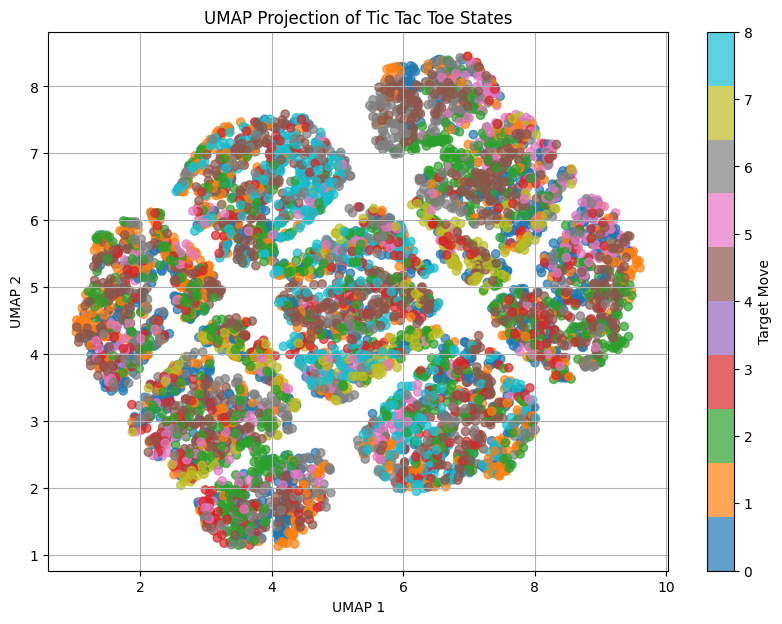

In [4]:
import umap
import matplotlib.pyplot as plt

# Reduce dimensionality with UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, metric='euclidean', random_state=42)
X_umap = reducer.fit_transform(X_flat)

# If your labels are one-hot encoded, convert them for coloring
y_labels = np.argmax(y, axis=1)

# Plot the UMAP projection
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_labels, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, ticks=range(9), label='Target Move')
plt.title('UMAP Projection of Tic Tac Toe States')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()